In [1]:
###### import required libraries #######
import numpy as np
import cv2
import matplotlib
import pywt
from matplotlib import pyplot as plt
%matplotlib inline

(562, 1000, 3)


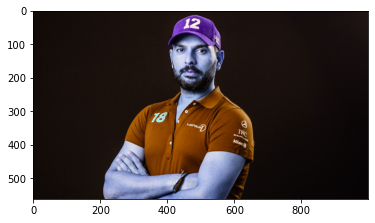

In [2]:
######## using open cv2 to read the image in normal view #######
img = cv2.imread('./yuvi.jpg')
print(img.shape)
plt.imshow(img)

(562, 1000)


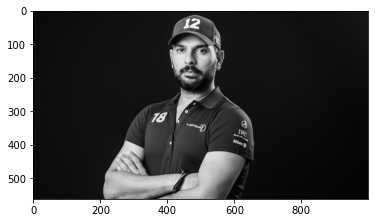

In [3]:
######## using open cv2 to read the image in grey scale #######
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[391,  62, 148, 148]], dtype=int32)

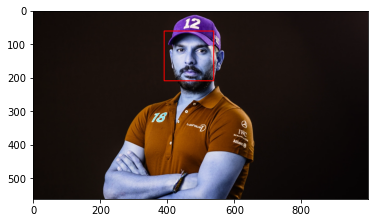

In [5]:
########### mark the dimension of face from entire image ##########
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

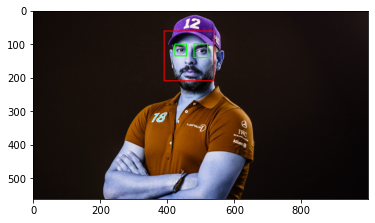

In [6]:
########### mark the dimension of face and eye from entire image ##########
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

(148, 148, 3)

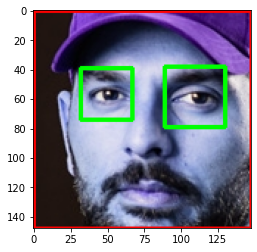

In [7]:
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)
cropped_img.shape

In [8]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

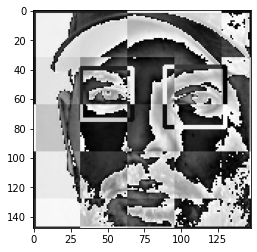

In [9]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


(580, 1070, 3)

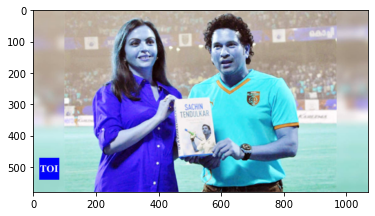

In [11]:
original_image = cv2.imread('./playersData/Sachin Tendulkar/photo.jpg')
plt.imshow(original_image)
original_image.shape

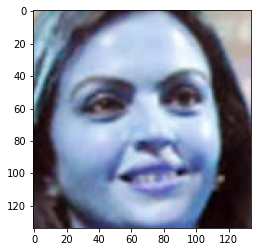

In [12]:
cropped_image = get_cropped_image_if_2_eyes('./playersData/Sachin Tendulkar/photo.jpg')
plt.imshow(cropped_image)

In [13]:
path_to_data = "./playersData/"
path_to_cr_data = "./playersData/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./playersData/cropped',
 './playersData/Rahul dravid',
 './playersData/Rohit Sharma',
 './playersData/Sachin Tendulkar',
 './playersData/Virat Kohli',
 './playersData/yuvraj Singh']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
import time
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
        except:
            time.sleep(1)
            continue
        

Generating cropped images in folder:  ./playersData/cropped/Rahul dravid
Generating cropped images in folder:  ./playersData/cropped/Rohit Sharma
Generating cropped images in folder:  ./playersData/cropped/Sachin Tendulkar
Generating cropped images in folder:  ./playersData/cropped/Virat Kohli
Generating cropped images in folder:  ./playersData/cropped/yuvraj Singh


In [40]:
cropped_image_dirs

['./playersData/cropped/Rahul dravid',
 './playersData/cropped/Rohit Sharma',
 './playersData/cropped/Sachin Tendulkar',
 './playersData/cropped/Virat Kohli',
 './playersData/cropped/yuvraj Singh']

In [41]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Rahul dravid': ['./playersData/cropped/Rahul dravid\\Rahul dravid1.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid10.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid11.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid12.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid14.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid15.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid16.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid17.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid18.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid2.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid3.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid4.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid5.png',
  './playersData/cropped/Rahul dravid\\Rahul dravid6.png'],
 'Rohit Sharma': ['./playersData/cropped/Rohit Sharma\\Rohit Sharma1.png',
  './playersData/cropped/Rohit Sharma\\Rohit Sharma10.png',
  './playersDa

In [42]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Rahul dravid': 0,
 'Rohit Sharma': 1,
 'Sachin Tendulkar': 2,
 'Virat Kohli': 3,
 'yuvraj Singh': 4}

In [43]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\welcome\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [45]:
print(len(x),len(y))

96 96


In [46]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(96, 4096)

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.5

In [49]:
x_train

array([[113.,  76.,  26., ..., 247., 204.,  46.],
       [ 99.,  99.,  99., ...,  24.,  25.,  28.],
       [ 19.,  16.,  11., ..., 236., 239.,   5.],
       ...,
       [175., 175., 176., ...,   8.,  13.,  20.],
       [161., 138., 125., ..., 252., 250., 251.],
       [ 22.,  22.,  24., ...,   7.,   2.,   1.]])

In [50]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [51]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.570476,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.373333,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.571429,{'logisticregression__C': 1}


In [52]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [53]:
best_estimators['svm'].score(x_test,y_test)

0.5416666666666666

In [54]:
best_estimators['random_forest'].score(x_test,y_test)

0.4166666666666667

In [55]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.5416666666666666

In [56]:
best_clf = best_estimators['logistic_regression']

Text(69.0, 0.5, 'Truth')

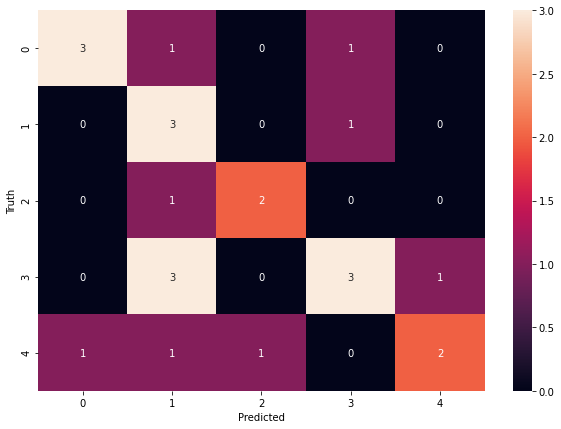

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
class_dict

{'Rahul dravid': 0,
 'Rohit Sharma': 1,
 'Sachin Tendulkar': 2,
 'Virat Kohli': 3,
 'yuvraj Singh': 4}

In [37]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))